cv2 basic functions
https://pythonexamples.org/python-opencv-read-image-cv2-imread/#1 



In [1]:
"""
Dataset: https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery

The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B
Use patchify....

Tile 1: 797 x 644 --> 768 x 512 --> 6
Tile 2: 509 x 544 --> 512 x 256 --> 2
Tile 3: 682 x 658 --> 512 x 512  --> 4
Tile 4: 1099 x 846 --> 1024 x 768 --> 12
Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16
Tile 6: 859 x 838 --> 768 x 768 --> 9
Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56
Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40
Total 9 images in each folder * (145 patches) = 1305
Total 1305 patches of size 256x256
"""

'\nDataset: https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery\n\nThe dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:\n\nBuilding: #3C1098\nLand (unpaved area): #8429F6\nRoad: #6EC1E4\nVegetation: #FEDD3A\nWater: #E2A929\nUnlabeled: #9B9B9B\nUse patchify....\n\nTile 1: 797 x 644 --> 768 x 512 --> 6\nTile 2: 509 x 544 --> 512 x 256 --> 2\nTile 3: 682 x 658 --> 512 x 512  --> 4\nTile 4: 1099 x 846 --> 1024 x 768 --> 12\nTile 5: 1126 x 1058 --> 1024 x 1024 --> 16\nTile 6: 859 x 838 --> 768 x 768 --> 9\nTile 7: 1817 x 2061 --> 1792 x 2048 --> 56\nTile 8: 2149 x 1479 --> 1280 x 2048 --> 40\nTotal 9 images in each folder * (145 patches) = 1305\nTotal 1305 patches of size 256x256\n'

In [1]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

Segmentation Models: using `keras` framework.


In [2]:
root_directory = 'C://Users//shree//Downloads//Semantic segmentation dataset/'
patch_size = 256

In [15]:
for path, subdirs, files in os.walk(root_directory):
    print(path)

C://Users//shree//Downloads//Semantic segmentation dataset/
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 2
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 2\images
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 2\masks
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 3
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 3\images
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 3\masks
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 4
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 4\images
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 4\masks
C://Users//shree//Downloads//Semantic segmentation dataset/Tile 5
C://Users//shree//Downloads//S

In [4]:
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   #Only read jpg images...
               
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                print("image shape: ", image.shape)

image shape:  (644, 797, 3)
image shape:  (644, 797, 3)
image shape:  (644, 797, 3)
image shape:  (643, 797, 3)
image shape:  (643, 797, 3)
image shape:  (643, 797, 3)
image shape:  (644, 797, 3)
image shape:  (644, 797, 3)
image shape:  (644, 797, 3)
image shape:  (544, 509, 3)
image shape:  (544, 510, 3)
image shape:  (544, 509, 3)
image shape:  (544, 509, 3)
image shape:  (544, 510, 3)
image shape:  (544, 509, 3)
image shape:  (544, 509, 3)
image shape:  (544, 510, 3)
image shape:  (544, 509, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (658, 682, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:  (846, 1099, 3)
image shape:

In [5]:
#Read images from repsective 'images' subdirectory
#As all images are of ddifferent size we have 2 options, either resize or crop
#But, some images are too large and some small. Resizing will change the size of real objects.
#Therefore, we will crop them to a nearest size divisible by 256 and then 
#divide all images into patches of 256x256x3.

image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   #Only read jpg images...
               
                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)             
       
                #Extract patches from each image
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        
                        #Use minmaxscaler instead of just dividing by 255. 
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. 
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.                               
                        image_dataset.append(single_patch_img)
                
image_dataset = np.array(image_dataset)               

Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_001.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_002.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_003.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_004.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_005.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_006.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_007.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\images/image_part_008.jpg
Now patchifying image: C://Users//shree//Downloads//Semantic segmentation datase

In [6]:
#Now doing the same as above for masks

mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   #Find all 'masks' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):   #Only read png images (masks in this dataset)
               
                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.                               
                        mask_dataset.append(single_patch_mask) 


mask_dataset =  np.array(mask_dataset)

Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_001.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_002.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_003.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_004.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_005.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_006.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_007.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/image_part_008.png
Now patchifying mask: C://Users//shree//Downloads//Semantic segmentation dataset/Tile 1\masks/im

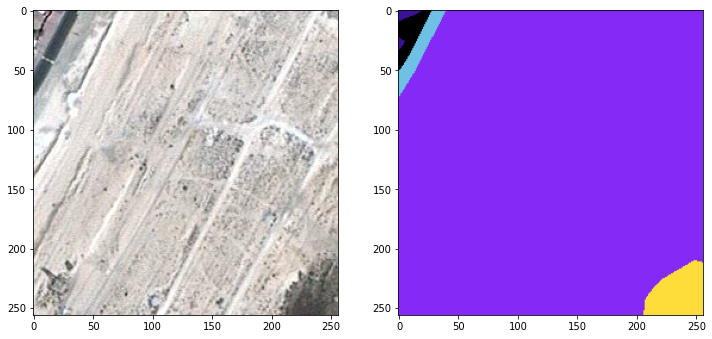

In [7]:
#check view a few images
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()

###########################################################################

In [8]:
"""
RGB to HEX: (Hexadecimel --> base 16)

Example: RGB --> R=201, G=, B=
R = 201/16 = 12 with remainder of 9. So hex code for R is C9 
Calculating RGB from HEX: #3C1098
3C = 3*16 + 12 = 60
10 = 1*16 + 0 = 16
98 = 9*16 + 8 = 152
"""

#Convert HEX to RGB array
# Try the following to understand how python handles hex values...
a=int('3C', 16)  #3C with base 16. Should return 60. 
print(a)
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

label = single_patch_mask


60


In [9]:
Building

array([ 60,  16, 152])

In [10]:
#Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer

def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   

In [11]:
labels[1304].shape

(256, 256)

In [12]:
labels = np.expand_dims(labels, axis=3)
print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [0 1 2 3 4 5]


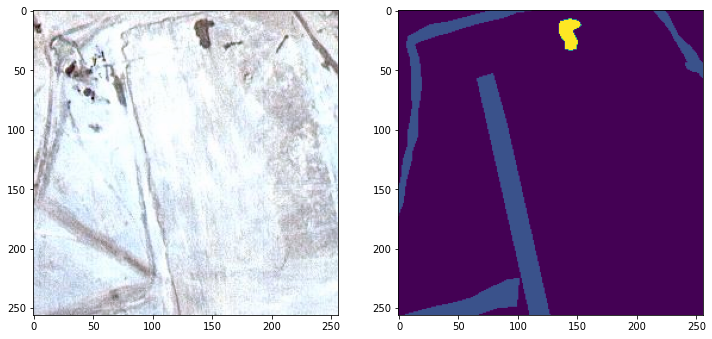

In [13]:
#check view a few images

import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()


In [14]:
# Splitting the dataset into train and validation set

n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [16]:
labels_cat.shape

(1305, 256, 256, 6)

In [20]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Flatten, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def multi_unet_model(n_classes, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS): #Build the model
    
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    #s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model

In [29]:
#Parameters for model
#Segmentation models losses can be combined together by '+' and scaled by integer or float factor

from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

'''
def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)  # -1 ultiplied as we want to minimize this value as loss function
'''

weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
dice_loss = sm.losses.DiceLoss(class_weights=weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)  #


IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

#from simple_multi_unet_model import multi_unet_model, jacard_coef  

metrics=['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')
model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_5 (Lambda)              (None, 256, 256, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv2d_95 (Conv2D)             (None, 256, 256, 16  448         ['lambda_5[0][0]']               
                                )                                                                 
                                                                                            

In [30]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/50
66/66 [==============================] - 459s 6s/step - loss: 1.0116 - accuracy: 0.5207 - jacard_coef: 0.1732 - val_loss: 0.9938 - val_accuracy: 0.5357 - val_jacard_coef: 0.2573
Epoch 2/50
66/66 [==============================] - 449s 6s/step - loss: 0.9839 - accuracy: 0.5994 - jacard_coef: 0.3054 - val_loss: 0.9823 - val_accuracy: 0.6447 - val_jacard_coef: 0.3322
Epoch 3/50
66/66 [==============================] - 373s 6s/step - loss: 0.9735 - accuracy: 0.6403 - jacard_coef: 0.3481 - val_loss: 0.9762 - val_accuracy: 0.6380 - val_jacard_coef: 0.3575
Epoch 4/50
66/66 [==============================] - 371s 6s/step - loss: 0.9697 - accuracy: 0.6523 - jacard_coef: 0.3722 - val_loss: 0.9638 - val_accuracy: 0.6747 - val_jacard_coef: 0.3792
Epoch 5/50
66/66 [==============================] - 371s 6s/step - loss: 0.9672 - accuracy: 0.6546 - jacard_coef: 0.3807 - val_loss: 0.9624 - val_accuracy: 0.6781 - val_jacard_coef: 0.4136
Epoch 6/50
66/66 [==============================] - 378

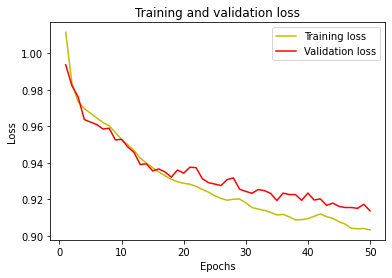

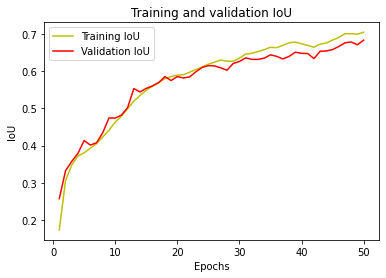

In [32]:
#plot the training and validation accuracy and loss at each epoch

history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

##################################

